#### **MNIST MLP with Keras**

This is a template of an MNIST classifier with an Artificial Neural Network (MLP)
If follows the basic blocks of a Deep Learning classifier

This version is prepared to run in colab or locally (to run it locally start in the imports cell)

<a target="_blank" href="https://colab.research.google.com/github/castorgit/DL-course/blob/main/00_MNIST_MLP_Keras.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
!pip install tensorflow==2.17.1
!pip install keras==3.6.0
!pip install session_info

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Input
from tensorflow.keras.layers import ReLU, Dense, Softmax
from tensorflow.keras.models import Model


In [3]:

# Hyperparameters

num_classes = 10  # this is the number of digits
num_epochs = 5
batch_size = 100
learning_rate = 0.001

#### **Reading MNIST Dataset**
Most frameworks offer an easy way to download the MNIST dataset. In this case we use the datasets method

This is the way that Keras reads the dataset



In [4]:
# Load MNIST dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
type(x_train)
# The loaded data are numpy arrays

numpy.ndarray

In [6]:
# Data Preprocessing
# Preprocess the data (flattening and normalization)
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#### **ANN architecture definition**
This is the key part of the notebook, in this cell we define the structure of the network 
and all the different elements mainly

- Activation function 
- Layer size
- Number of layers

In this example you have a simple model with a hidden layer of 10 neurons. How good will it be?

In [7]:
# MLP Model 1 hidden layer input size 784, output layer 10 (num of classes)
# ANN sizing details
hidden_size = 10

inputs = Input(shape= (784,))
x = Dense(hidden_size)(inputs)
x = ReLU()(x)
x = Dense(10)(x)
output = Softmax()(x)

model = Model(inputs=inputs, outputs=output)

I0000 00:00:1736784294.009658   16417 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1736784294.066817   16417 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1736784294.066859   16417 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1736784294.075482   16417 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1736784294.075566   16417 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [8]:
model.compile(optimizer='SGD',
              loss='MeanSquaredError',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=100, validation_split=0.2)

Epoch 1/100


I0000 00:00:1736784306.288584   16528 service.cc:146] XLA service 0x7fdc10006540 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736784306.288617   16528 service.cc:154]   StreamExecutor device (0): NVIDIA T600 Laptop GPU, Compute Capability 7.5
I0000 00:00:1736784308.216013   16528 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0908 - loss: 0.0902 - val_accuracy: 0.1159 - val_loss: 0.0894
Epoch 2/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1156 - loss: 0.0893 - val_accuracy: 0.1444 - val_loss: 0.0887
Epoch 3/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1488 - loss: 0.0886 - val_accuracy: 0.1783 - val_loss: 0.0879
Epoch 4/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1891 - loss: 0.0879 - val_accuracy: 0.2221 - val_loss: 0.0872
Epoch 5/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2265 - loss: 0.0871 - val_accuracy: 0.2578 - val_loss: 0.0864
Epoch 6/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2644 - loss: 0.0863 - val_accuracy: 0.2925 - val_loss: 0.0854
Epoch 7/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2928 - loss: 0.0855 - val_accuracy: 0.3181 - val_loss: 0.0844
Epoch 8/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3235 - loss: 0.0843 - val_accuracy: 0.3402

480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7151 - loss: 0.0421 - val_accuracy: 0.7215 - val_loss: 0.0407
Epoch 52/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7149 - loss: 0.0418 - val_accuracy: 0.7223 - val_loss: 0.0405
Epoch 53/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7163 - loss: 0.0414 - val_accuracy: 0.7237 - val_loss: 0.0402
Epoch 54/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7185 - loss: 0.0411 - val_accuracy: 0.7247 - val_loss: 0.0399
Epoch 55/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7187 - loss: 0.0409 - val_accuracy: 0.7259 - val_loss: 0.0396
Epoch 56/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7190 - loss: 0.0406 - val_accuracy: 0.7268 - val_loss: 0.0394
Epoch 57/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7260 - loss: 0.0398 - val_accuracy: 0.7287 - val_loss: 0.0391
Epoch 58/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7230 - loss: 0.0399 - val_accuracy:

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 - 2s - 6ms/step - accuracy: 0.8029 - loss: 0.0295
Test accuracy: 80.29%


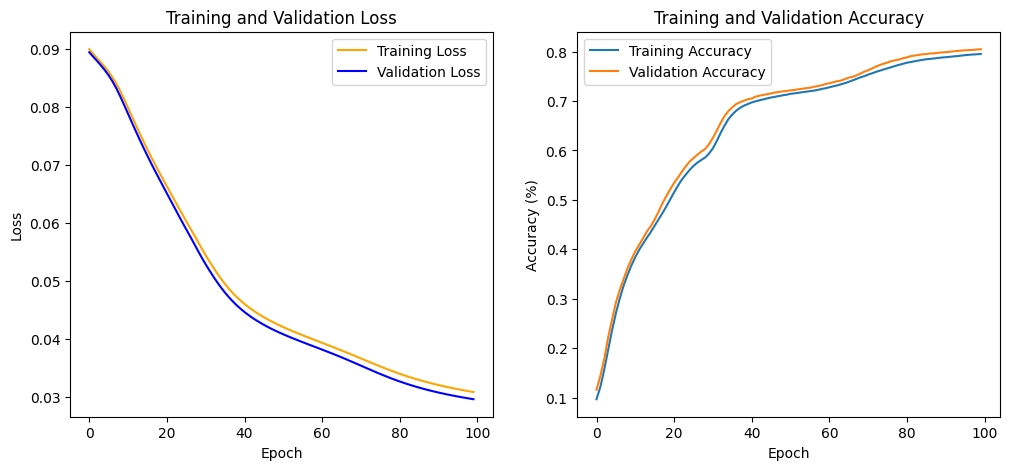

In [10]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='orange')
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [11]:
import session_info
session_info.show(html=False)

-----
keras               3.6.0
matplotlib          3.9.2
numpy               1.26.4
session_info        1.0.0
tensorflow          2.17.1
-----
IPython             8.28.0
jupyter_client      8.6.3
jupyter_core        5.7.2
-----
Python 3.12.3 (main, Nov  6 2024, 18:32:19) [GCC 13.2.0]
Linux-5.15.167.4-microsoft-standard-WSL2-x86_64-with-glibc2.39
-----
Session information updated at 2025-01-13 17:07


# 